In [71]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sktime.datasets import load_airline
from sktime.forecasting.statsforecast import StatsForecastMSTL
from sktime.utils import plot_series
from sktime.forecasting.statsforecast import StatsForecastAutoCES
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.statsforecast import StatsForecastAutoARIMA
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.base import ForecastingHorizon
from sktime.split import temporal_train_test_split
from sktime.forecasting.statsforecast import StatsForecastAutoETS
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.ets   import AutoETS
smape = MeanAbsolutePercentageError(symmetric = True)

## Описание датасета
[Датасет](https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.datasets.load_airline.html)

Данные авиакомпании Box & Jenkins. Ежемесячное количество пассажиров международных авиалиний с 1949 по 1960 год. 
Длина серии: 144 Частота: Ежемесячно

In [23]:
y = load_airline()
y

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

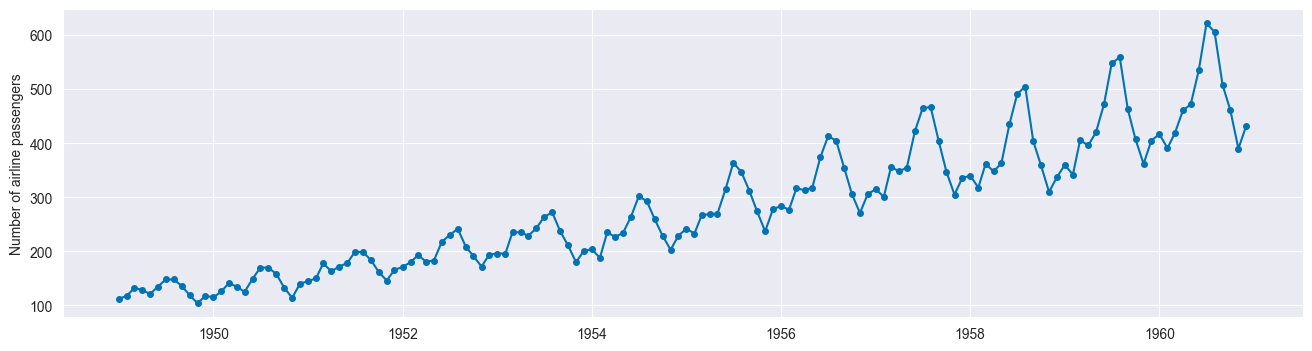

In [24]:
plot_series(y)

In [25]:
y_train, y_test = temporal_train_test_split(y, test_size=0.4)

In [79]:
def smp_plot_series(y_train_p, y_test_p, y_pred_p = None):
    if y_pred_p is None:
        plot_series(y_train_p, y_test_p, labels=["y_train", "y_test"])
    else:
        plot_series(y_train_p, y_test_p, y_pred_p, labels=["y_train", "y_test", "y_pred"])

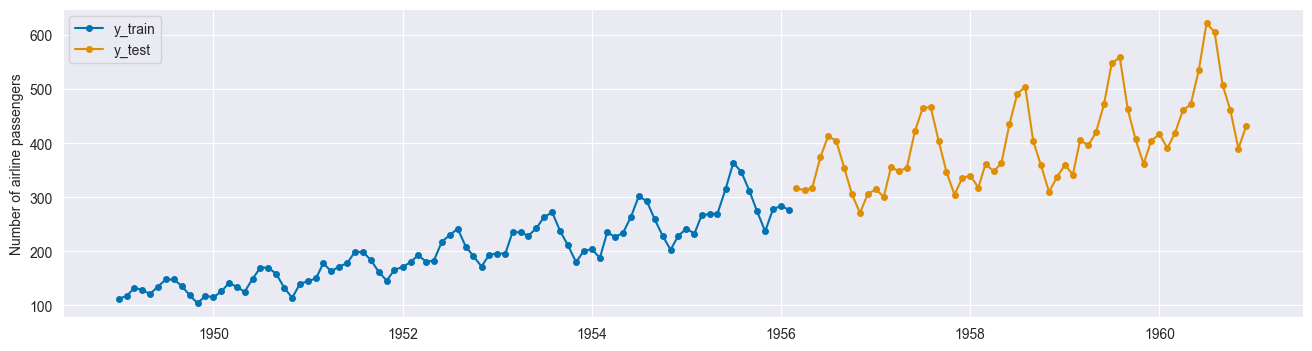

In [80]:
smp_plot_series(y_train, y_test);

Далее пробуем разные алгоритмы для предсказания с лекций

sMAPE = 0.303


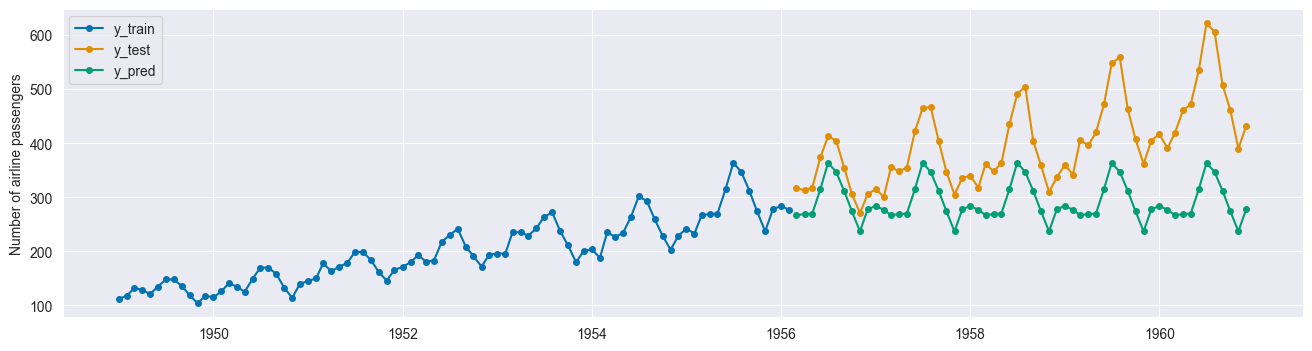

In [81]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
smp_plot_series(y_train, y_test, y_pred)

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

sMAPE = 0.114


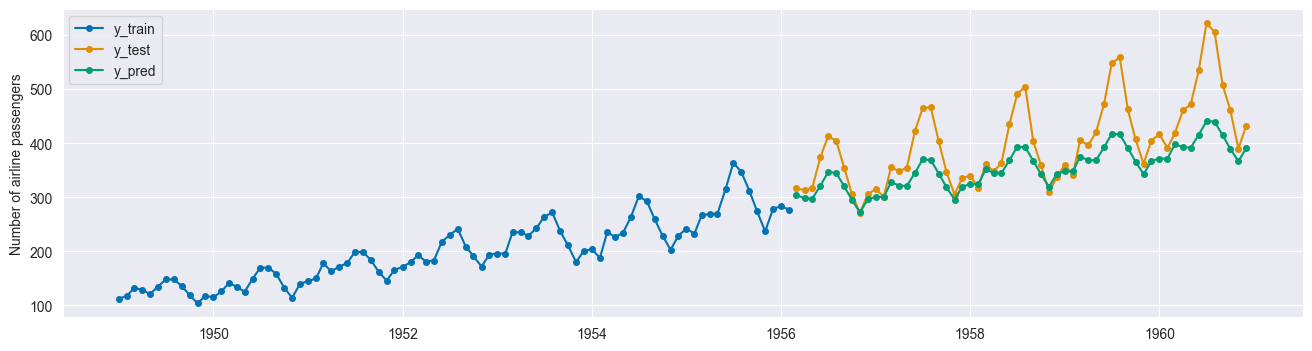

In [82]:
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
smp_plot_series(y_train, y_test, y_pred)

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

sMAPE = 0.093


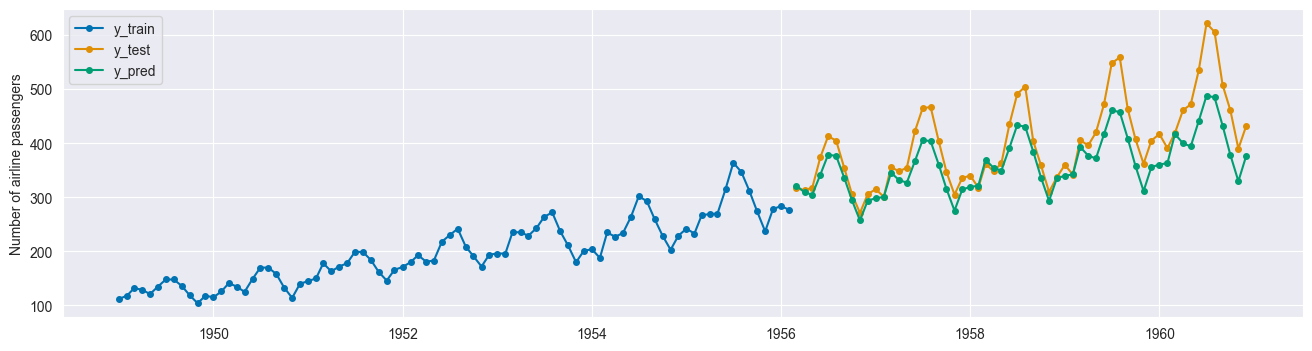

In [83]:
forecaster = AutoETS(auto=True, sp=12, n_jobs=20)

fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

smp_plot_series(y_train, y_test, y_pred)

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

sMAPE = 0.265


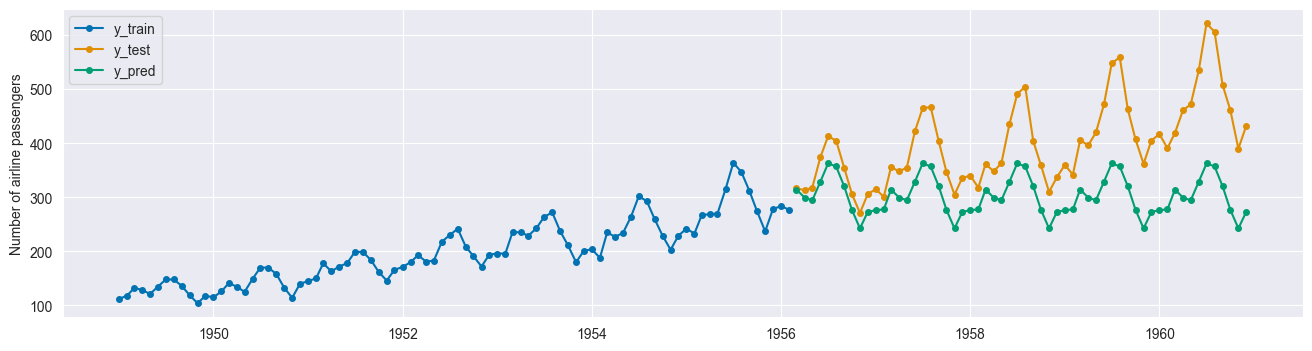

In [84]:
forecaster = StatsForecastAutoETS(season_length = 12)

forecaster.fit(y_train, fh=fh)
y_pred = forecaster.predict(fh)

smp_plot_series(y_train, y_test, y_pred)
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

sMAPE = 0.097


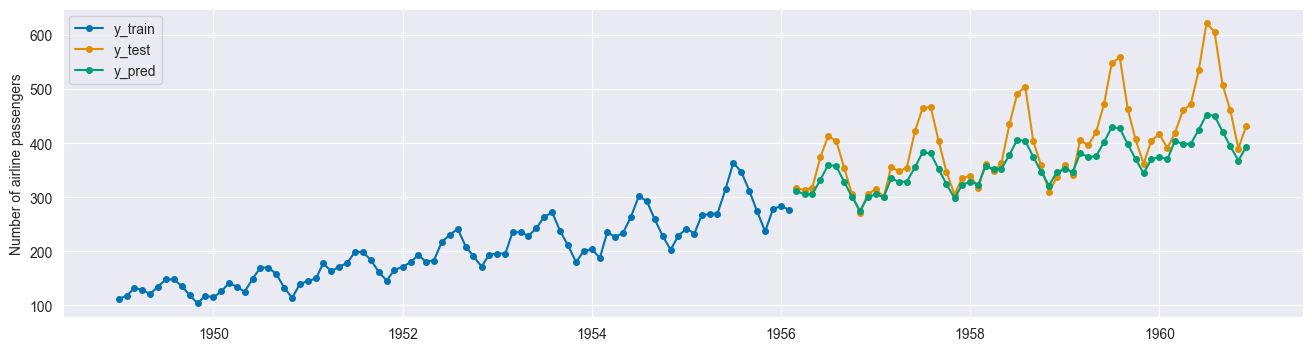

In [85]:
forecaster = StatsForecastMSTL(season_length=12)  
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

smp_plot_series(y_train, y_test, y_pred)
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

sMAPE = 0.153


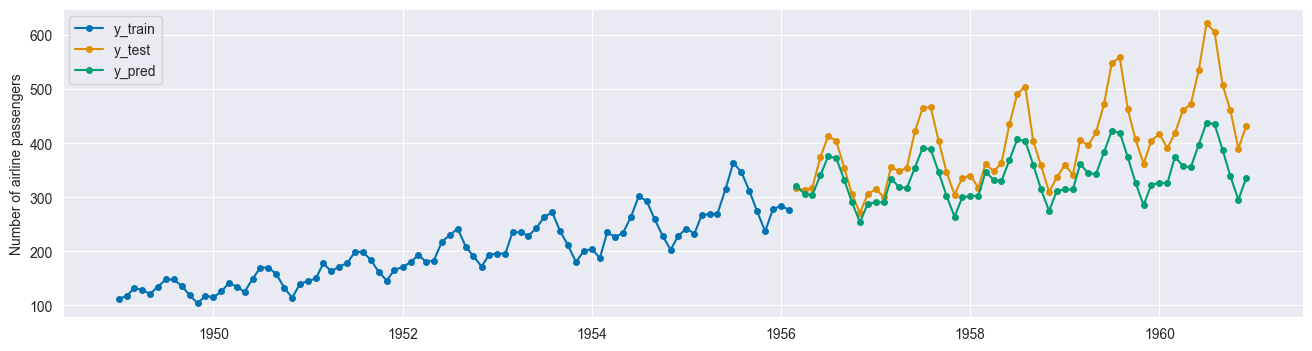

In [86]:
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train, fh=fh)
y_pred = forecaster.predict(fh)

smp_plot_series(y_train, y_test, y_pred)
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

sMAPE = 0.073


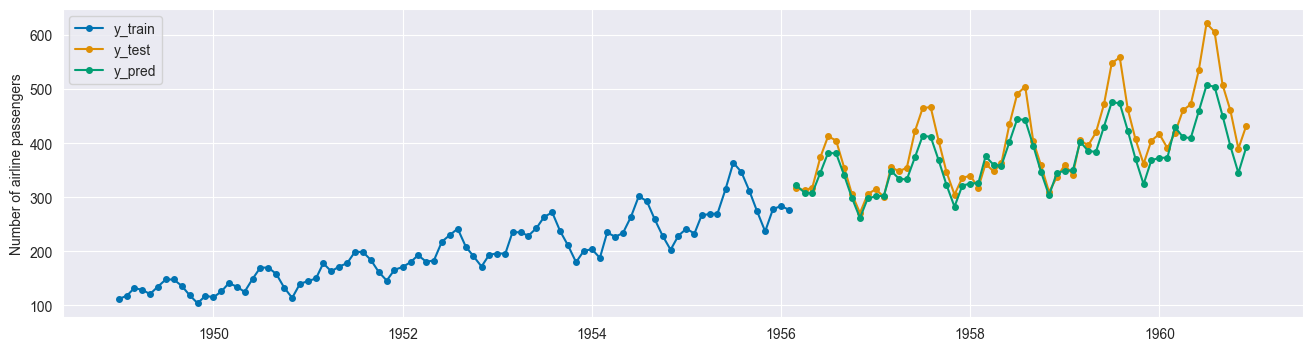

In [87]:
from sktime.forecasting.statsforecast import StatsForecastAutoTheta

forecaster = StatsForecastAutoTheta(season_length = 12)

forecaster.fit(y_train, fh=fh)
y_pred = forecaster.predict(fh)

smp_plot_series(y_train, y_test, y_pred)
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

sMAPE = 0.114


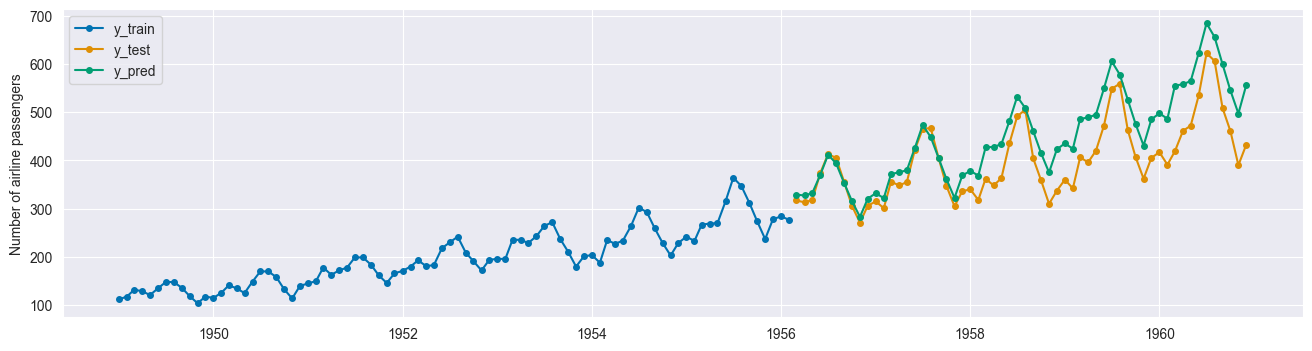

In [88]:
forecaster =  StatsForecastAutoCES(season_length = 12)
forecaster.fit(y_train, fh=fh)
y_pred = forecaster.predict(fh)
smp_plot_series(y_train, y_test, y_pred)
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

sMAPE = 0.043


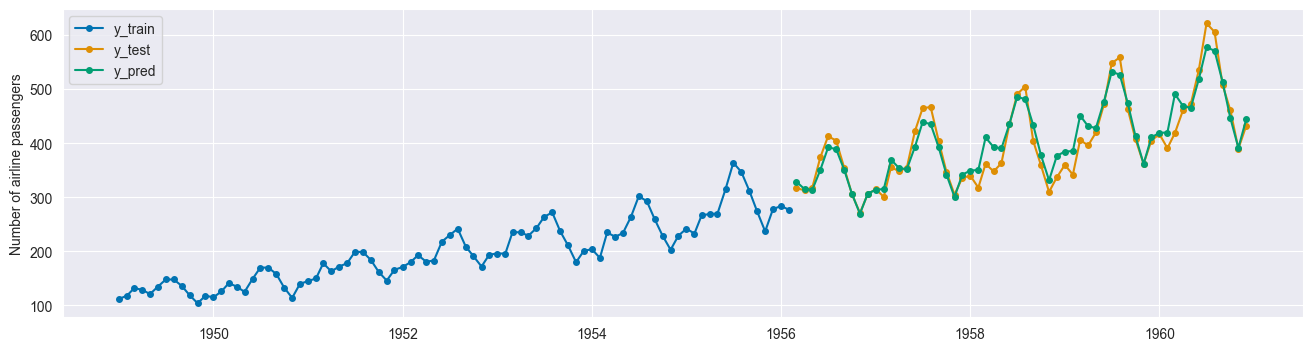

In [89]:
forecaster = TBATS(
    use_box_cox=True,
    use_trend=True,
    use_damped_trend=True,
    sp=[12],
    use_arma_errors=True,
    n_jobs=-1)
forecaster.fit(y_train)
fh = ForecastingHorizon(y_test.index, is_relative=False)
y_pred = forecaster.predict(fh)
smp_plot_series(y_train, y_test, y_pred)
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

12:38:05 - cmdstanpy - INFO - Chain [1] start processing
12:38:05 - cmdstanpy - INFO - Chain [1] done processing


sMAPE = 0.059


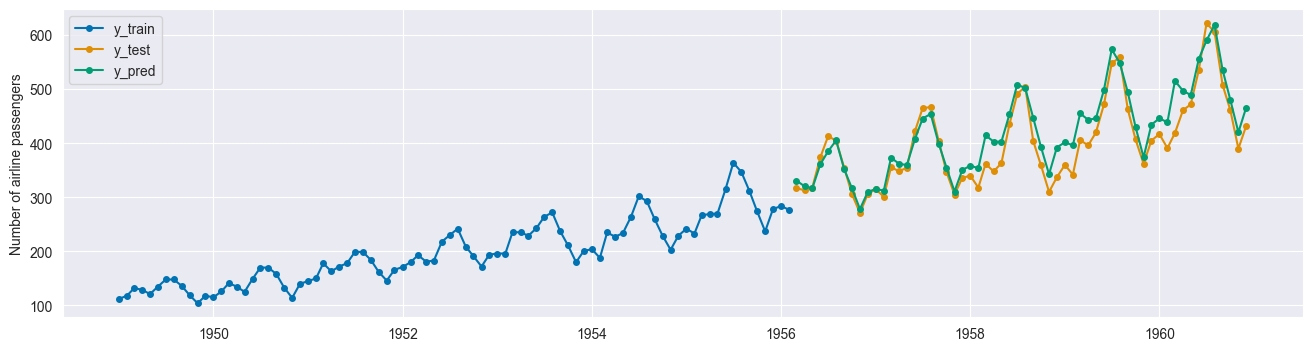

In [90]:
forecaster = Prophet(  
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y_train) / 12),
    yearly_seasonality=True)
forecaster.fit(y_train)
fh = ForecastingHorizon(y_test.index, is_relative=False)
y_pred = forecaster.predict(fh)
smp_plot_series(y_train, y_test, y_pred)
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

In [91]:
model = AutoARIMA(start_p=1,
                  d=1,
                  start_q=0,
                  max_p=5,
                  max_q=5,            
                  seasonal=True,  
                  start_P=0,
                  start_Q=0,                
                  D=1,
                  sp=12,
                  max_order = 7,
                  trace  = True,
                  stepwise = True,
                  n_jobs = 20,
                  error_action='ignore',  
                  suppress_warnings=True)

model.fit(y_train)

C:\Program Files\Python311\Lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=548.308, Time=0.03 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=551.501, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   : AIC=545.463, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=545.815, Time=0.08 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=549.719, Time=0.01 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=547.463, Time=0.37 sec
 ARIMA(1,1,0)(1,1,1)[12] intercept   : AIC=547.463, Time=0.14 sec
 ARIMA(1,1,0)(0,1,1)[12] intercept   : AIC=545.912, Time=0.10 sec
 ARIMA(1,1,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=548.015, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12] intercept   : AIC=547.438, Time=0.13 sec
 ARIMA(1,1,1)(1,1,0)[12] intercept   : AIC=547.051, Time=0.15 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=545.336, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=548.218, Time=0.03 sec
 ARIMA(0,1,1)(2,1,0)[12] intercept   

AutoARIMA(D=1, d=1, error_action='ignore', max_order=7, n_jobs=20, sp=12,
          start_P=0, start_Q=0, start_p=1, start_q=0, suppress_warnings=True,
          trace=True)

sMAPE = 0.071


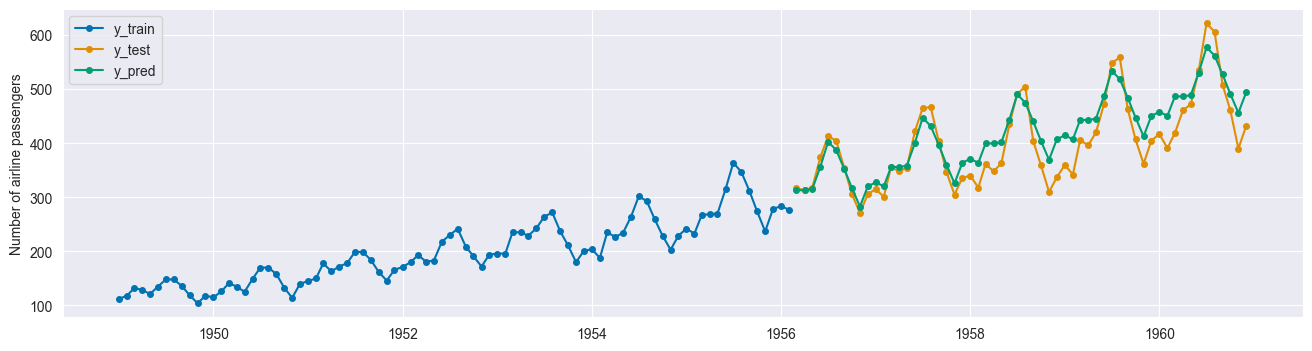

In [92]:
fhout = ForecastingHorizon(y_test.index, is_relative=False)
y_out = model.predict(fhout)

smp_plot_series(y_train, y_test, y_out)

print(f'sMAPE = {smape(y_out.values, y_test.values):.3f}')

In [93]:
model = StatsForecastAutoARIMA(start_p=1,
                              d=1,
                              start_q=0,
                              max_p=5,
                              max_q=5,               
                              seasonal=True,   
                              start_P=0,
                              start_Q=0,              
                              D=1,
                              sp=12,
                              max_order = 7,
                              trace  = True,
                              stepwise = True, 
                              n_jobs = 20
                              )

model.fit(y_train)

C:\Program Files\Python311\Lib\site-packages\sktime\forecasting\base\adapters\_generalised_statsforecast.py:120: UserWarning: Keyword arguments "num_cores" will be omitted as they are not found in the __init__ method from <class 'statsforecast.models.AutoARIMA'>. Check your statsforecast version to find out the right API parameters.
  warn(warning_message)



ARIMA(1,1,0)(0,1,0)[12]                   :546.8270399684923

ARIMA(0,1,0)(0,1,0)[12]                   :549.7749563510567

ARIMA(1,1,0)(1,1,0)[12]                   :544.3485331041289

ARIMA(0,1,1)(0,1,1)[12]                   :544.7048752736029

ARIMA(1,1,0)(2,1,0)[12]                   :546.7494948975988

ARIMA(1,1,0)(1,1,1)[12]                   :547.0805322731882

ARIMA(1,1,0)(0,1,1)[12]                   :544.7244692439652

ARIMA(1,1,0)(2,1,1)[12]                   :549.5634693328641

ARIMA(0,1,0)(1,1,0)[12]                   :546.5366027204402

ARIMA(2,1,0)(1,1,0)[12]                   :546.5259321347795

ARIMA(1,1,1)(1,1,0)[12]                   :547.5785270947042

ARIMA(0,1,1)(1,1,0)[12]                   :544.3202665583257

ARIMA(0,1,1)(0,1,0)[12]                   :546.8122411905791

ARIMA(0,1,1)(2,1,0)[12]                   :546.6458129097432

ARIMA(0,1,1)(1,1,1)[12]                   :547.3340343886433

ARIMA(0,1,1)(2,1,1)[12]                   :549.3790714316906

ARIMA(0

StatsForecastAutoARIMA(D=1, d=1, max_order=7, n_jobs=20, sp=12, start_P=0,
                       start_Q=0, start_p=1, start_q=0, trace=True)

sMAPE = 0.070


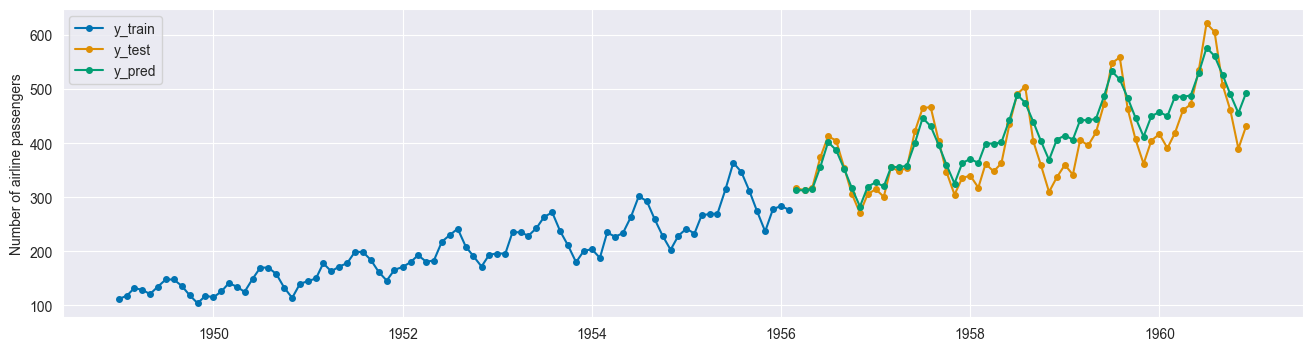

In [94]:
fhout = ForecastingHorizon(y_test.index, is_relative=False)
y_out = model.predict(fhout)

smp_plot_series(y_train, y_test, y_out)

print(f'sMAPE = {smape(y_out.values, y_test.values):.3f}')

sMAPE = 0.282


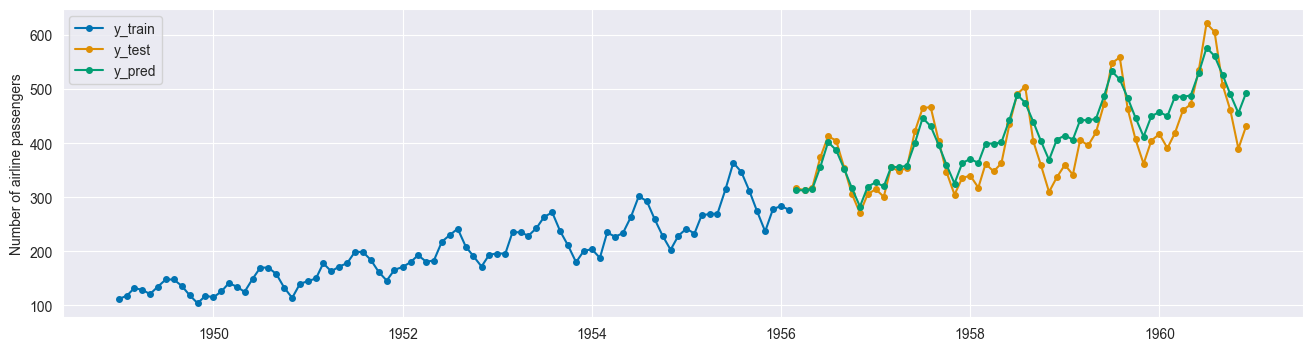

In [95]:
regressor = KNeighborsRegressor(n_neighbors=2)
forecaster = make_reduction(regressor, window_length=12, strategy="recursive")
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
smp_plot_series(y_train, y_test, y_out)
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

По итогу точнее всех оказался алгоритм TBATS